# Рекомендация по открытию ресторана по населению районов города Алматы

**Проект разработанный специально для DS Challenge 2019**

Студент 2 курса Международного Университета Информационных Технологий, специальности "Computer Science" - Джантыков Айдар

20.05.2019

## Оглавление
- [Вступление: Бизнес проблема](#intro)
- [Данные](#data)
- [Методология](#method)
- [Анализ и визуализация](#analysis)
- [Результаты и обсуждения](#results)
- [Заключение](#conclusion)
- [Источники](#references)

## Вступление: Бизнес проблема <a name="intro"></a>
Для открытия успешного ресторанного бизнеса, нам требуется узнать где этот бизнес будет пользоваться спросом. В этом проекте мы постараемся найти оптимальное место для ресторана. В частности, этот отчет будет адресован заинтересованным сторонам, заинтересованным в открытии ресторана в городе Алматы, Казахстан. В данном проекте мы постараемся выяснить оптимальное местонахождение ресторана по соотношению плотности населения и количеству ресторанов по близости.

## Данные <a name="data"></a>
Нам потребуются данные о количестве проживающих в разных районах города. Мы будем производить сбор всех необходимых данных с открытых источников, таких как [[1]](#references),[[2]](#references) и др. Также нам потребуется использование Foursquare API, для определения ресторанов по близости и их классификации [[5]](#references).

## Методология<a name="method"></a>
В этом проекте мы направим наши усилия на выявление районов Алматы с высокой плотностью населения и определение количества ресторанов по близости. 

На **первом этапе** мы собрали все необходимые данные по населению районов города Алматы на 1 апреля 2019 года (согласно Комитету по статистике Министерства национальной экономики Республики Казахстан [[1]](#references). 

**Вторым этапом** была обработка данных. Исключение неиспользуемых значений и городов РК, построение новой таблицы данных для последующей работы с ней. 

**Третьим этапом** нам требовалось визуализировать все имеющиеся данные, для построения более точной рекомендации.

**Четвертым этапом** потребовалось найти GEOjson файл, в котором состояли координаты всех районов города Алматы, которые требовались для классификации по плотности населения[[3]](#references).

**Пятым этапом** было построение карты плотности населения и последующий поиск ресторанов в городе Алматы.

**Шестой** и заключительный этап состоял из выведения результатов и построения рекомендации.

## Анализ и визуализация <a name="analysis"></a>
Перед началом работы, нам требуется установить все необходимые библиотеки, с помощью которых будет производиться анализ и визулизация. Также нам требуется считать файл данных.

In [1]:
import numpy as np  
import pandas as pd 
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

Дополнительно нам требуется установить специальную библиотеку для работы с картами

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

In [65]:
df_alm=pd.read_excel("Almaty_population_2019.xlsx")

In [66]:
df_alm

,Neighborhood,Count,lat,long
0,Almaly,215768,43.255220,76.927133
1,Alatau,260441,43.298628,76.831061
2,Auezov,295543,43.223376,76.847334
3,Bostandyq,343541,43.169788,76.929244
4,Zhetysu,166001,43.323875,76.929575
5,Medeu,209836,43.144485,77.028917
6,Nauryzbay,128169,43.189284,76.802733
7,Turksib,235357,43.347832,77.012400


После импорта базы данных, нам предстоит ее обработка в тот формат, который нам нужен для исследования

In [67]:
df_alm.drop(["lat", "long"], axis=1, inplace=True)
df_alm.set_index('Neighborhood', inplace=True)

In [68]:
df_alm

,Count
Neighborhood,
Almaly,215768
Alatau,260441
Auezov,295543
Bostandyq,343541
Zhetysu,166001
Medeu,209836
Nauryzbay,128169
Turksib,235357


После полной подготовки данных, настало время приступить к визуализации. Построив графики и диаграммы нам будет легче анализировать в каком именно районе лучше всего будет открыть ресторан.

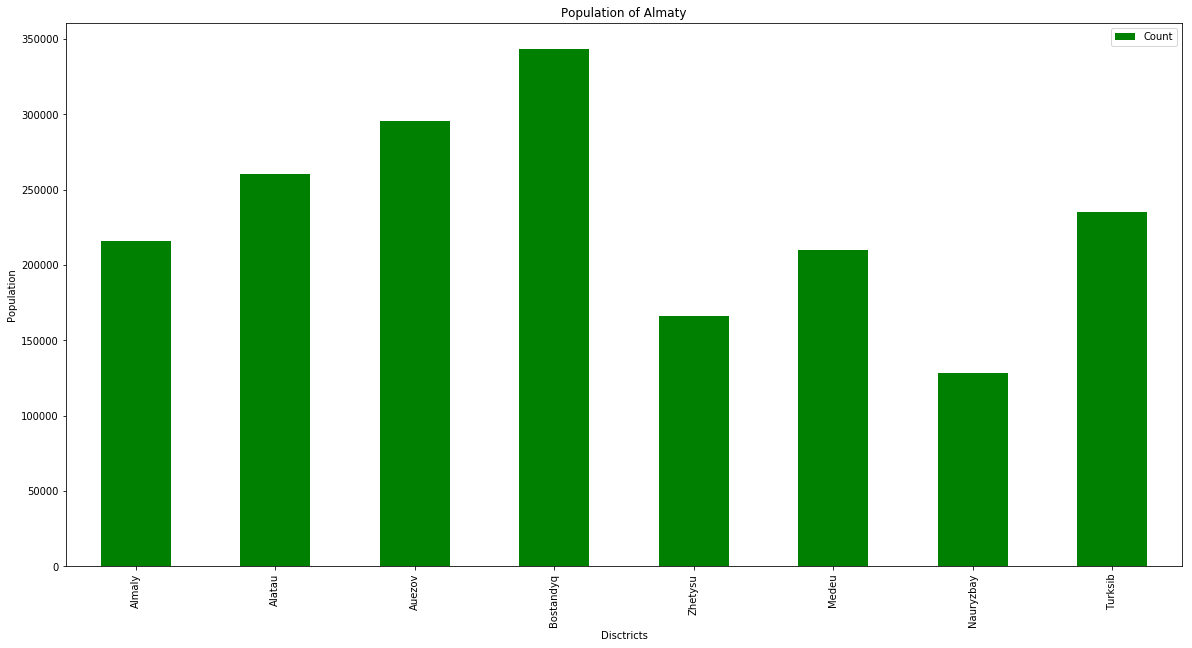

In [69]:

df_alm.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10),
            color='g',
            label=df_alm['Count']
             )

plt.title('Population of Almaty')
plt.ylabel('Population')
plt.xlabel('Disctricts')
plt.show()

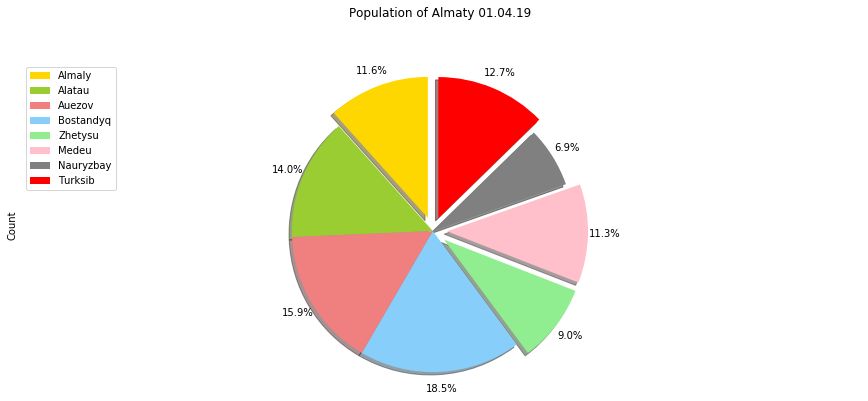

In [70]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'gray', 'red']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1, 0, 0.1]
df_alm['Count'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )
plt.title('Population of Almaty 01.04.19', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_alm.index, loc='upper left') 

plt.show()

Для того, чтобы мы могли анализиировать со всех сторон, нам следует посторить Waffle Chart

In [71]:
from PIL import Image # converting images into arrays
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

In [72]:
total_values = sum(df_alm['Count'])
category_proportions = [(int(value) / total_values) for value in df_alm['Count']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_alm.index.values[i] + ': ' + str(proportion))

Almaly: 0.11633855550571104
Alatau: 0.1404255020877187
Auezov: 0.15935192294420097
Bostandyq: 0.18523165481900686
Zhetysu: 0.0895050079367818
Medeu: 0.11314011870664964
Nauryzbay: 0.0691066159977915
Turksib: 0.12690062200213947


In [73]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [74]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_alm.index.values[i] + ': ' + str(tiles))

Almaly: 47
Alatau: 56
Auezov: 64
Bostandyq: 74
Zhetysu: 36
Medeu: 45
Nauryzbay: 28
Turksib: 51


In [75]:
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [76]:
waffle_chart

array([[1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
        3., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 6., 6., 6., 6.,
        6., 7., 7., 8., 8., 8., 8., 8.],
       [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
        3., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 6., 6., 6., 6.,
        6., 7., 7., 8., 8., 8., 8., 8.],
       [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
        3., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 6., 6., 6., 6.,
        7., 7., 7., 8., 8., 8., 8., 8.],
       [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
        3., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 6., 6., 6., 6.,
        7., 7., 7., 8., 8., 8., 8., 8.],
       [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
        3., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 6., 6., 6., 6.,
        7., 7., 7., 8., 8., 8., 8., 8.],
       [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
   

<Figure size 432x288 with 0 Axes>

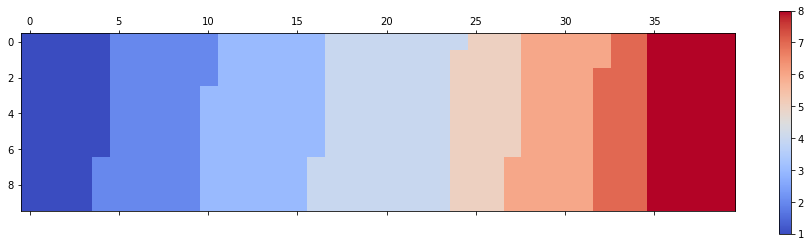

In [77]:
fig = plt.figure()

# use matshow to display the waffle chart
colors_list = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colors_list)
plt.colorbar()

Давайте немного подкорректируем данный график, чтобы нам было легче распределять популяцию по районам города

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

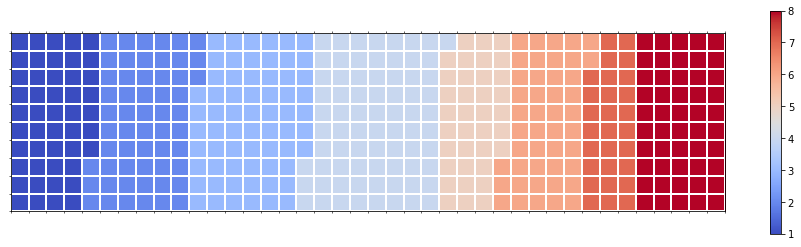

In [78]:
fig = plt.figure()

# use matshow to display the waffle chart
colors_list = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colors_list)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

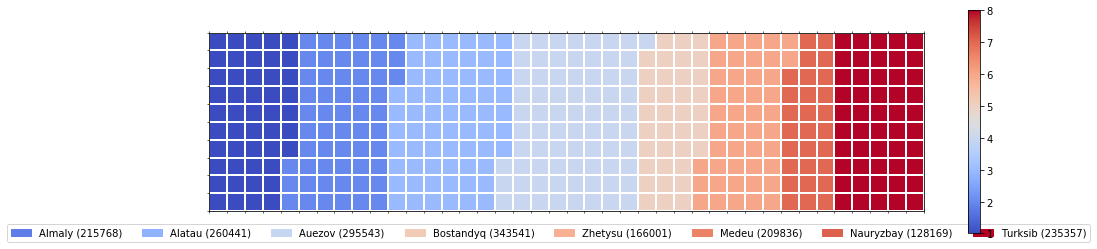

In [84]:
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_alm['Count'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_alm.index.values):
    label_str = category + ' (' + str(df_alm['Count'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_alm.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

Также можно добавить Scatter Plot

In [87]:
df_alm=pd.read_excel("Almaty_population_2019.xlsx")

In [88]:
df_alm.drop(["lat", "long"], axis=1, inplace=True)

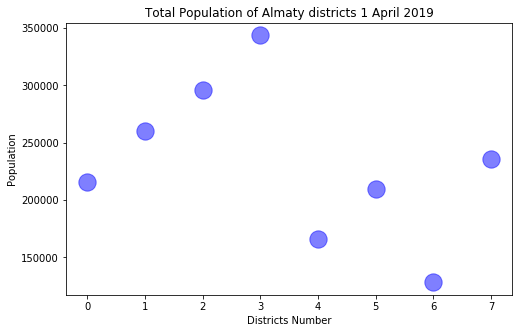

In [102]:
df_alm['Dist'] = range(8)
df_alm.plot(kind='scatter', x='Dist', y='Count', figsize=(8, 5), alpha=0.5, color='blue', s=300)

plt.title('Total Population of Almaty districts 1 April 2019')
plt.xlabel('Districts Number')
plt.ylabel('Population')

plt.show()

Теперь добавим карту города Алматы и добавим на них популяцию районов

In [103]:
alm_map=folium.Map(location=[43.238949, 76.889709], zoom_start=10)

In [104]:
alm_map

In [105]:
!wget --quiet almaty-districts.geo.json
alm_dis_geo = r'almaty-districts.geo.json'

In [106]:
df_alm=pd.read_excel("Almaty_population_2019.xlsx")
df_alm.drop(["lat", "long"], axis=1, inplace=True)

In [108]:
alm_map.choropleth(
    geo_data=alm_dis_geo,
    data=df_alm,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population of Almaty',
)

In [109]:
alm_map

### Использование Foursquare API для определения ближайших ресторанов

Прежде всего нам требуется установить все необходимые библиотеки, зарегистрироваться на сервисе Foursquare как разработчик для доступа к API и соединить их с нашим проектом.

In [110]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

In [120]:
CLIENT_ID = 'U3SLQ2BKREJCS2G2PZGP0UJTGVX0KGT1CNGX5QMWOAUSUOQ2' # your Foursquare ID
CLIENT_SECRET = 'ZXWT32PZWFWIWW5LW0UXBUW4BYSFTHGNF5OBFIDDMRZ3ZF3Q' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: U3SLQ2BKREJCS2G2PZGP0UJTGVX0KGT1CNGX5QMWOAUSUOQ2
CLIENT_SECRET:ZXWT32PZWFWIWW5LW0UXBUW4BYSFTHGNF5OBFIDDMRZ3ZF3Q


#### Здесь мы настраиваем локацию на город Алматы, страна Казахстан.

In [112]:
address = 'Almaty, KZ'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.2363924 76.9457275


Посылаем запрос на поиск ресторанов в округе

In [121]:
search_query = 'Restaurant'
radius = 25000

In [129]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, 60)
url

'https://api.foursquare.com/v2/venues/search?client_id=U3SLQ2BKREJCS2G2PZGP0UJTGVX0KGT1CNGX5QMWOAUSUOQ2&client_secret=ZXWT32PZWFWIWW5LW0UXBUW4BYSFTHGNF5OBFIDDMRZ3ZF3Q&ll=43.2363924,76.9457275&v=20180604&query=Restaurant&radius=25000&limit=60'

In [130]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ce975856a60714940c624f7'},
 'response': {'venues': [{'id': '50195ee0e4b0f528fa943ffd',
    'name': 'Balcon Restaurant & Bar',
    'location': {'address': 'ул. Фурманова, 176',
     'crossStreet': 'ниже ул. Сатпаева',
     'lat': 43.240588309386936,
     'lng': 76.9485464242482,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.240588309386936,
       'lng': 76.9485464242482}],
     'distance': 520,
     'cc': 'KZ',
     'city': 'Алматы',
     'state': 'Алматы',
     'country': 'Қазақстан',
     'formattedAddress': ['Алматы',
      'Алматы',
      'ул. Фурманова, 176 (ниже ул. Сатпаева)',
      'Қазақстан']},
    'categories': [{'id': '52e81612bcbc57f1066b7a00',
      'name': 'Comfort Food Restaurant',
      'pluralName': 'Comfort Food Restaurants',
      'shortName': 'Comfort Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': 

Нам следует преобразовать данные значения, чтобы мы могли ими воспользоваться и добавить на карту

In [131]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '52e81612bcbc57f1066b7a00', 'name': 'C...",False,50195ee0e4b0f528fa943ffd,"ул. Фурманова, 176",KZ,Алматы,Қазақстан,ниже ул. Сатпаева,520,"[Алматы, Алматы, ул. Фурманова, 176 (ниже ул. ...","[{'label': 'display', 'lat': 43.24058830938693...",43.240588,76.948546,NaN,NaN,Алматы,Balcon Restaurant & Bar,v-1558803845,62931773
1,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",False,57d52e16498ed67afa35ea9c,NaN,KZ,Алматы,Қазақстан,NaN,1741,"[Алматы, Алматы, Қазақстан]","[{'label': 'display', 'lat': 43.25150701488504...",43.251507,76.940172,NaN,NaN,Алматы,Marina Et & Balık Restaurant Almaty,v-1558803845,NaN
2,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",False,4fcb27a9e4b0881ba3afa711,"ул. Желтоксан, 181",KZ,Алматы,Қазақстан,уг. ул. Тимирязева,439,"[050013, Алматы, Алматы, ул. Желтоксан, 181 (у...","[{'label': 'display', 'lat': 43.23574272575541...",43.235743,76.940385,NaN,050013,Алматы,Asian Cafe Restaurant,v-1558803845,NaN
3,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,597c39878fb09e05ed43a400,NaN,KZ,Алматы,Қазақстан,NaN,236,"[Алматы, Алматы, Қазақстан]","[{'label': 'display', 'lat': 43.238506, 'lng':...",43.238506,76.945435,NaN,NaN,Алматы,Hodja-Nasreddin Restaurant,v-1558803845,NaN
4,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,51944e6c498e9c357513ea21,Kurmangazy st.,KZ,Алматы,Қазақстан,Kunaev st.,972,"[Алматы, Алматы, Kurmangazy st. (Kunaev st.), ...","[{'label': 'display', 'lat': 43.24417005889186...",43.244170,76.951177,NaN,NaN,Алматы,Restaurant @ Dostyk Hotel,v-1558803845,NaN


In [132]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Balcon Restaurant & Bar,Comfort Food Restaurant,"ул. Фурманова, 176",KZ,Алматы,Қазақстан,ниже ул. Сатпаева,520,"[Алматы, Алматы, ул. Фурманова, 176 (ниже ул. ...","[{'label': 'display', 'lat': 43.24058830938693...",43.240588,76.948546,NaN,NaN,Алматы,50195ee0e4b0f528fa943ffd
1,Marina Et & Balık Restaurant Almaty,Mediterranean Restaurant,NaN,KZ,Алматы,Қазақстан,NaN,1741,"[Алматы, Алматы, Қазақстан]","[{'label': 'display', 'lat': 43.25150701488504...",43.251507,76.940172,NaN,NaN,Алматы,57d52e16498ed67afa35ea9c
2,Asian Cafe Restaurant,Asian Restaurant,"ул. Желтоксан, 181",KZ,Алматы,Қазақстан,уг. ул. Тимирязева,439,"[050013, Алматы, Алматы, ул. Желтоксан, 181 (у...","[{'label': 'display', 'lat': 43.23574272575541...",43.235743,76.940385,NaN,050013,Алматы,4fcb27a9e4b0881ba3afa711
3,Hodja-Nasreddin Restaurant,Restaurant,NaN,KZ,Алматы,Қазақстан,NaN,236,"[Алматы, Алматы, Қазақстан]","[{'label': 'display', 'lat': 43.238506, 'lng':...",43.238506,76.945435,NaN,NaN,Алматы,597c39878fb09e05ed43a400
4,Restaurant @ Dostyk Hotel,Restaurant,Kurmangazy st.,KZ,Алматы,Қазақстан,Kunaev st.,972,"[Алматы, Алматы, Kurmangazy st. (Kunaev st.), ...","[{'label': 'display', 'lat': 43.24417005889186...",43.244170,76.951177,NaN,NaN,Алматы,51944e6c498e9c357513ea21
5,Restaurant Naru,Korean Restaurant,Almaty,KZ,NaN,Қазақстан,NaN,1103,"[Almaty, Қазақстан]","[{'label': 'display', 'lat': 43.22951901617955...",43.229519,76.955526,NaN,NaN,NaN,52b19817498ee215599c7fc7
6,Wagon Restaurant,Restaurant,"ул. Богенбай батыра, 241",KZ,Алматы,Қазақстан,ул. Нурмакова,3553,"[Алматы, Алматы, ул. Богенбай батыра, 241 (ул....","[{'label': 'display', 'lat': 43.25047175358234...",43.250472,76.906400,NaN,NaN,Алматы,4e7af90f899860afc9ab5bfd
7,Tennis Bar&Restaurant,BBQ Joint,NaN,KZ,NaN,Қазақстан,NaN,527,[Қазақстан],"[{'label': 'display', 'lat': 43.23473738178303...",43.234737,76.939631,NaN,NaN,NaN,55d98736498e2fe29bb5a889
8,"Restaurant ""Shah """,Middle Eastern Restaurant,"Гагарина, 292",KZ,Алматы,Қазақстан,Гагарина Левитана,5188,"[Алматы, Алматы, Гагарина, 292 (Гагарина Левит...","[{'label': 'display', 'lat': 43.20443140373238...",43.204431,76.899171,NaN,NaN,Алматы,55b90f48498efce108eac0e4
9,Glasshouse Restaurant,Restaurant,Holiday Inn,KZ,Алматы,Қазақстан,NaN,679,"[Алматы, Алматы, Holiday Inn, Қазақстан]","[{'label': 'display', 'lat': 43.23337041042104...",43.233370,76.938454,NaN,NaN,Алматы,50306cdce4b0f8a001420c1e


In [133]:
dataframe_filtered.name

0                 Balcon Restaurant & Bar
1     Marina Et & Balık Restaurant Almaty
2                   Asian Cafe Restaurant
3              Hodja-Nasreddin Restaurant
4               Restaurant @ Dostyk Hotel
5                         Restaurant Naru
6                        Wagon Restaurant
7                   Tennis Bar&Restaurant
8                      Restaurant "Shah "
9                   Glasshouse Restaurant
10                                OLIVIER
11                    Shavlego Restaurant
12                    Saltanat restaurant
13                       THALI Restaurant
14                    Чайхана "Тюбетейка"
15                         Restaurant TAU
16                Saint Pierre Restaurant
17                       Issyk Restaurant
18                       Rixos Restaurant
19           Restaurant Across Crying Ivy
20          Ritz Palace Korean Restaurant
21                      restaurant Daulet
22                     Beijing Restaurant
23                              Bo

Когда все необходимые условия были выполнены, можно приступить к построению карты города Алматы с отмеченными ресторанами на ней

In [137]:
#venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='City Center',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(alm_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(alm_map)

# display map
alm_map

## Результаты и обсуждения<a name="results"></a>

После визуализации всех необходимых данных, пора приступать к результатам исследования. 

Наш анализ показывает, что, хотя в Алматы существует большое количество ресторанов (около 50 в нашей первоначальной области интереса), довольно близко к центру города (немного западнее) есть места с низкой плотностью ресторанов и высокой плотностью населения. Наибольшая концентрация ресторанов была обнаружена в самом центре города и севернее от центра на расстоянии 5 км. Наша исследование было сосредоточено на выявление плотности населения и ресторанов по районам города Алматы. Из всех районов города, наиболее интересным нам показался Бостандыкский район. Так как он имеет максимальную плотность населения (около 350 000 человек) и минимальное количество ресторанов в округе. Наша рекомендация состоит в том, чтобы открыть ресторан именно в этом районе, так как он с наиболее высокой вероятностью будет пользоваться спросом. Либо посмотреть в сторону Ауэзовского района, так как плотность населения в нем почти так же высока, как и в Бостандыкском, а конкуренция в разы меньше. 

Результатом всего этого является определение зон, содержащих наибольшее количество потенциальных новых ресторанов, в зависимости от количества и расстояния до существующих ресторанов в целом. Это, конечно, не означает, что эти зоны - действительно оптимальные места для нового ресторана! Цель этого анализа состояла в том, чтобы предоставить информацию о районах, их плотности населения и расположенных недалеко ресторанов, но не переполненных существующими ресторанами - вполне возможно, что есть очень веская причина для небольшого количества ресторанов в любом из этих районов, причины, которые сделает их непригодными для нового ресторана, несмотря на отсутствие конкуренции в этом районе. Поэтому рекомендуемые зоны следует рассматривать только как отправную точку для более подробного анализа, что в конечном итоге может привести к локации, в которой не только не будет соревнования поблизости, но также будут учтены другие факторы и соблюдены все другие соответствующие условия.


## Заключение <a name="conclusion"></a>

Целью этого проекта было выявление районов Алматы, расположенных близко к центру, с небольшим количеством ресторанов, чтобы помочь заинтересованным сторонам сузить поиск оптимального местоположения для нового итальянского ресторана. 

Рассчитав распределение плотности населения по данным Комитета по статистике Министерства национальной экономики Республики Казахстан и плотности ресторанов по данным Foursquare, мы построили рекомендательную системы по открытию нового ресторана в городе Алматы, котороы с большей вероятностью будет пользоваться спросом.

Окончательное решение об оптимальном расположении ресторана будет приниматься заинтересованными сторонами на основе конкретных характеристик окрестностей и мест в каждой рекомендуемой зоне с учетом дополнительных факторов, таких как привлекательность каждого места (близость к парку или воде), уровень шума / близость к основным дорогам, наличие недвижимости, цены, социальная и экономическая динамика каждого района и т. д.

## Источники <a name="references"></a>

1. http://stat.gov.kz
1. https://data.egov.kz
1. https://github.com/akilbekov/almaty.geo.json
1. https://2gis.kz
1. https://foursquare.com
1. https://www.coursera.org/learn/applied-data-science-capstone/